<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Desenvolvimento e Deploy de Modelos de Machine Learning</font>
## <font color='blue'>Projeto 2</font>
### <font color='blue'>Prevendo o Churn de Clientes com RandomForest - Da Concepção do Problema ao Deploy</font>

## Pacotes Python Usados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import joblib
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Configurações básicas para os gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [6, 5]

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando os Dados

In [5]:
# Carregando o dataset
df_dsa = pd.read_csv('dataset.csv')

In [6]:
# Tipo de objeto
type(df_dsa)

pandas.core.frame.DataFrame

In [7]:
# Shape
df_dsa.shape

(1000, 7)

In [8]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              1000 non-null   int64  
 1   UsoMensal          1000 non-null   int64  
 2   Plano              1000 non-null   object 
 3   SatisfacaoCliente  1000 non-null   int64  
 4   TempoContrato      1000 non-null   object 
 5   ValorMensal        1000 non-null   float64
 6   Churn              1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [9]:
# Amostra dos dados
df_dsa.head()

,Idade,UsoMensal,Plano,SatisfacaoCliente,TempoContrato,ValorMensal,Churn
0,56,52,Premium,1,Curto,75.48,0
1,69,65,Basico,4,Curto,79.25,0
2,46,76,Standard,3,Longo,183.56,0
3,32,42,Basico,2,Longo,162.50,0
4,60,74,Standard,2,Longo,186.23,1


## Análise Exploratória

Definimos a variável target (alvo do estudo).

Variável Churn:

- 1 --> Classe positiva (houve churn, ou seja, cancelou a assinatura)
- 0 --> Classe negativa (não houve churn, ou seja, não cancelou a assinatura)

In [10]:
# Análise Exploratória de Dados (EDA)
def eda(dados):
    
    for column in dados.columns:
        
        # Se a coluna for numérica
        if dados[column].dtype in ['int64', 'float64']:
            
            # Histograma e Boxplot
            fig, axes = plt.subplots(1, 2)
            sns.histplot(dados[column], kde = True, ax = axes[0])
            sns.boxplot(x = 'Churn', y = column, data = dados, ax = axes[1])
            axes[0].set_title(f'Distribuição de {column}')
            axes[1].set_title(f'{column} vs Churn')
            plt.tight_layout()
            plt.show()
            
        # Se a coluna for categórica
        else:
            
            # Contagem de frequência e relação com Churn
            fig, axes = plt.subplots(1, 2)
            sns.countplot(x = column, data = dados, ax = axes[0])
            sns.countplot(x = column, hue = 'Churn', data = dados, ax = axes[1])
            axes[0].set_title(f'Distribuição de {column}')
            axes[1].set_title(f'{column} vs Churn')
            plt.tight_layout()
            plt.show()

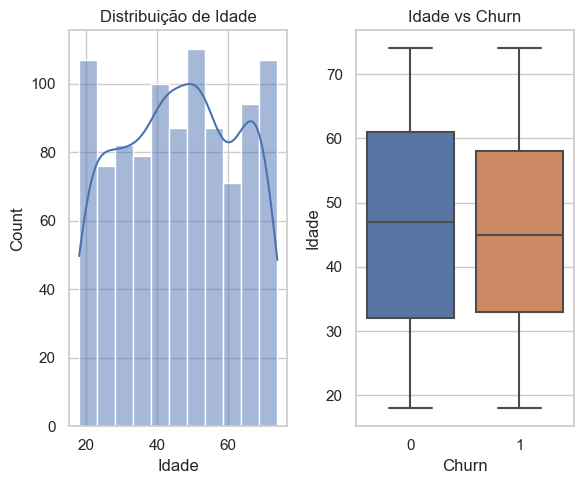

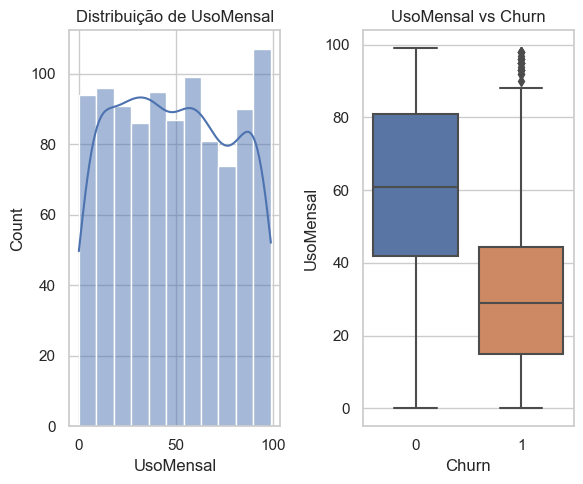

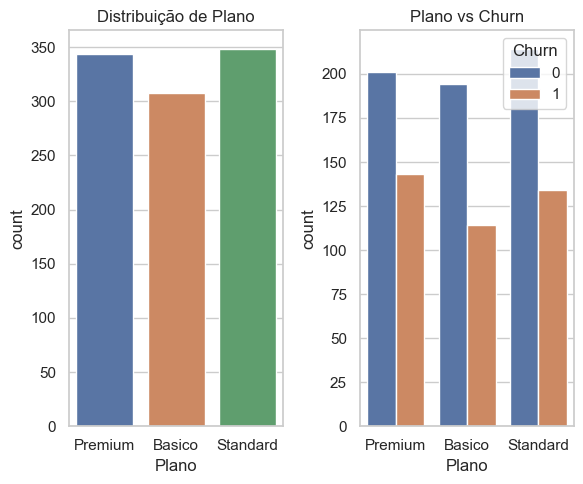

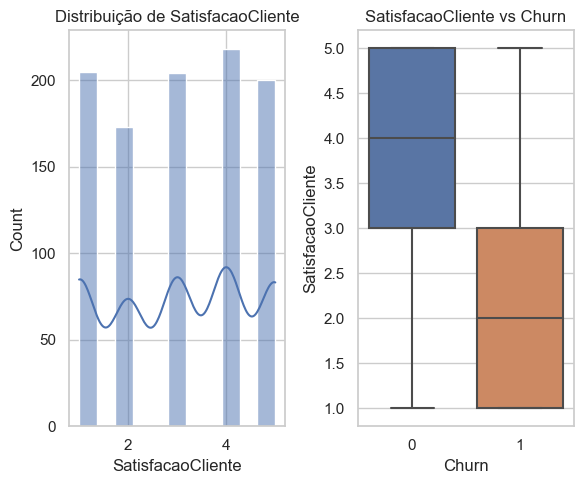

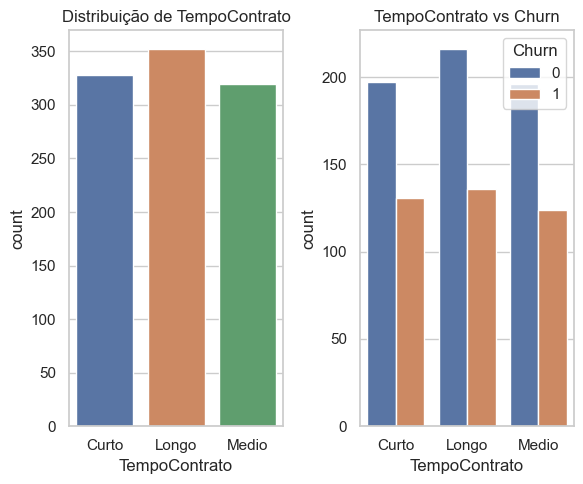

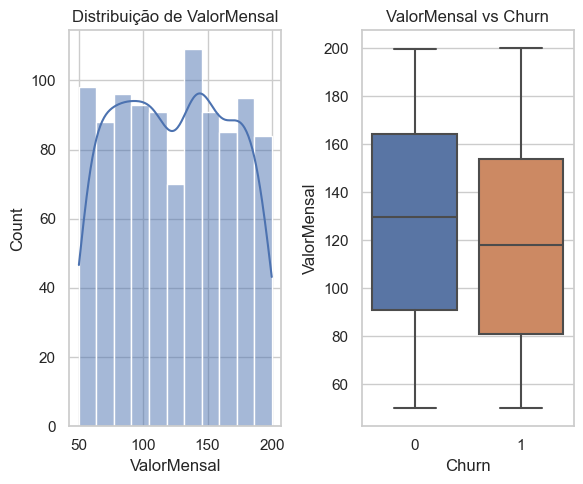

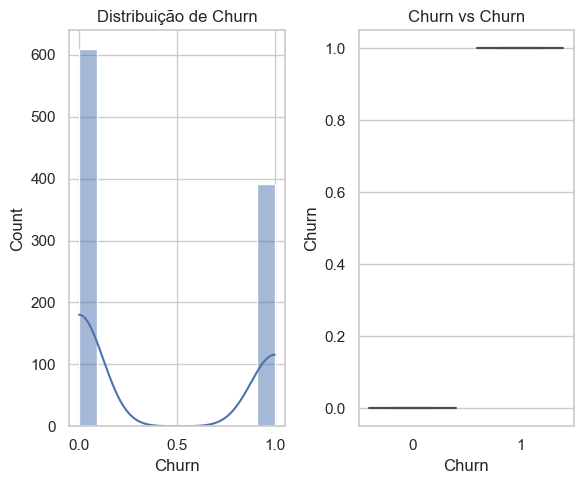

In [11]:
# Realizando a EDA
eda(df_dsa)

## Automação do Processo de Divisão em Dados de Treino e Teste

In [12]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              1000 non-null   int64  
 1   UsoMensal          1000 non-null   int64  
 2   Plano              1000 non-null   object 
 3   SatisfacaoCliente  1000 non-null   int64  
 4   TempoContrato      1000 non-null   object 
 5   ValorMensal        1000 non-null   float64
 6   Churn              1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [13]:
# Função para automatizar a divisão em treino e teste
def split_dataset(data, target_column, test_size, random_state = 42):
    """
    Divide o dataset em conjuntos de treino e teste.

    Parâmetros:
    - data (DataFrame): O DataFrame completo.
    - target_column (str): O nome da coluna alvo (target).
    - test_size (float): A proporção do conjunto de teste.
    - random_state (int): Seed para a geração de números aleatórios (padrão é 42).

    Retorna:
    - X_train (DataFrame): Conjunto de treino para as variáveis independentes.
    - X_test (DataFrame): Conjunto de teste para as variáveis independentes.
    - y_train (Series): Conjunto de treino para a variável alvo.
    - y_test (Series): Conjunto de teste para a variável alvo.
    """

    # Dados de entrada
    X = data.drop(target_column, axis = 1)
    
    # Dados de saída
    y = data[target_column]
    
    # Divisão em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = test_size, 
                                                        random_state = random_state)

    return X_train, X_test, y_train, y_test

In [14]:
# Uso da função anterior
valor_test_size = 0.3
X_train, X_test, y_train, y_test = split_dataset(df_dsa, 'Churn', test_size = valor_test_size)

In [15]:
# Verificando o tamanho dos conjuntos de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 6), (300, 6), (700,), (300,))

## Pré-Processamento dos Dados

O pré-processamento, especialmente a aplicação de técnicas de encoding e a normalização de dados, deve idealmente ser feito após a divisão do dataset em conjuntos de treino e teste. Isso evita o vazamento de informações do conjunto de teste para o conjunto de treino, o que pode acontecer se o pré-processamento for feito antes da divisão. 

In [16]:
# Amostra dos dados
df_dsa.head()

,Idade,UsoMensal,Plano,SatisfacaoCliente,TempoContrato,ValorMensal,Churn
0,56,52,Premium,1,Curto,75.48,0
1,69,65,Basico,4,Curto,79.25,0
2,46,76,Standard,3,Longo,183.56,0
3,32,42,Basico,2,Longo,162.50,0
4,60,74,Standard,2,Longo,186.23,1


In [17]:
# Selecionando as variáveis categóricas
categorical_cols = df_dsa.select_dtypes(include = ['object']).columns

In [18]:
categorical_cols

Index(['Plano', 'TempoContrato'], dtype='object')

### One-Hot Encoding

In [19]:
# Aplicando One-Hot Encoding separadamente aos conjuntos de treino e teste
encoder = OneHotEncoder(sparse_output = False)

Por padrão, o OneHotEncoder retorna uma matriz esparsa quando você o utiliza para transformar dados. Uma matriz esparsa é uma maneira eficiente de armazenar dados com muitos zeros (valores não presentes). No entanto, se você definir sparse_output=False, o encoder retornará uma matriz densa (numpy array) em vez de uma matriz esparsa. Uma matriz densa é mais fácil de trabalhar e entender, mas pode consumir mais memória se os dados forem grandes e a maioria dos valores for zero.

In [20]:
# Treinando o encoder com o conjunto de treino e transformando ambos treino e teste
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

In [21]:
# Renomeando as colunas para corresponderem aos nomes das categorias
X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)

In [22]:
# Removendo as colunas categóricas originais e adicionando as codificadas
X_train_preprocessed = X_train.drop(categorical_cols, axis = 1).reset_index(drop = True)
X_train_preprocessed = pd.concat([X_train_preprocessed, X_train_encoded], axis = 1)

In [23]:
X_train_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,65,80,4,174.10,0.0,0.0,1.0,0.0,0.0,1.0
1,49,18,3,101.59,1.0,0.0,0.0,0.0,1.0,0.0
2,19,91,4,87.93,1.0,0.0,0.0,0.0,0.0,1.0
3,52,0,1,90.74,0.0,0.0,1.0,0.0,1.0,0.0
4,62,60,1,134.59,1.0,0.0,0.0,1.0,0.0,0.0


Toda e qualquer transformação aplicada aos dados de treino, deve ser aplicada aos dados de teste e aos novos dados.

In [24]:
# Removendo as colunas categóricas originais e adicionando as codificadas
X_test_preprocessed = X_test.drop(categorical_cols, axis = 1).reset_index(drop = True)
X_test_preprocessed = pd.concat([X_test_preprocessed, X_test_encoded], axis = 1)

In [25]:
# Visualizando as primeiras linhas dos datasets de treino e teste após pré-processamento
X_train_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,65,80,4,174.10,0.0,0.0,1.0,0.0,0.0,1.0
1,49,18,3,101.59,1.0,0.0,0.0,0.0,1.0,0.0
2,19,91,4,87.93,1.0,0.0,0.0,0.0,0.0,1.0
3,52,0,1,90.74,0.0,0.0,1.0,0.0,1.0,0.0
4,62,60,1,134.59,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X_test_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,36,86,3,190.77,0.0,0.0,1.0,0.0,0.0,1.0
1,61,31,4,177.03,1.0,0.0,0.0,0.0,0.0,1.0
2,24,38,2,139.14,1.0,0.0,0.0,1.0,0.0,0.0
3,26,94,4,162.87,0.0,0.0,1.0,1.0,0.0,0.0
4,70,70,1,58.34,0.0,1.0,0.0,1.0,0.0,0.0


### StandardScaler

In [27]:
# Variáveis numéricas
numeric_cols = X_train_preprocessed.select_dtypes(include = ['int64', 'float64']).columns

In [28]:
# Criando o StandardScaler
scaler = StandardScaler()

In [29]:
# Aplicando o StandardScaler às variáveis numéricas
X_train_preprocessed[numeric_cols] = scaler.fit_transform(X_train_preprocessed[numeric_cols])
X_test_preprocessed[numeric_cols] = scaler.transform(X_test_preprocessed[numeric_cols])

In [30]:
# Visualizando as primeiras linhas dos datasets de treino e teste após pré-processamento
X_train_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,1.180292,1.069020,0.676895,1.130872,-0.668043,-0.720027,1.362770,-0.685994,-0.729197,1.415730
1,0.178225,-1.055509,-0.029255,-0.544723,1.496910,-0.720027,-0.733799,-0.685994,1.371371,-0.706349
2,-1.700652,1.445952,0.676895,-0.860385,1.496910,-0.720027,-0.733799,-0.685994,-0.729197,1.415730
3,0.366112,-1.672308,-1.441554,-0.795450,-0.668043,-0.720027,1.362770,-0.685994,1.371371,-0.706349
4,0.992405,0.383688,-1.441554,0.217856,1.496910,-0.720027,-0.733799,1.457738,-0.729197,-0.706349


In [31]:
X_test_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,-0.635955,1.274619,-0.029255,1.516090,-0.668043,-0.720027,1.362770,-0.685994,-0.729197,1.415730
1,0.929775,-0.610043,0.676895,1.198580,1.496910,-0.720027,-0.733799,-0.685994,-0.729197,1.415730
2,-1.387505,-0.370177,-0.735404,0.323000,1.496910,-0.720027,-0.733799,1.457738,-0.729197,-0.706349
3,-1.262247,1.548752,0.676895,0.871364,-0.668043,-0.720027,1.362770,1.457738,-0.729197,-0.706349
4,1.493438,0.726354,-1.441554,-1.544164,-0.668043,1.388838,-0.733799,1.457738,-0.729197,-0.706349


## Modelagem

In [32]:
# Criando o modelo RandomForest
dsa_modelo_v1 = RandomForestClassifier(random_state = 42)

In [33]:
# Treinando o modelo
dsa_modelo_v1.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Fazendo previsões no conjunto de teste
y_pred = dsa_modelo_v1.predict(X_test_preprocessed)

In [35]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [36]:
accuracy

0.7966666666666666

In [37]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       182
           1       0.74      0.74      0.74       118

    accuracy                           0.80       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300



## Validação Cruzada

In [38]:
# Criando um novo modelo RandomForest para validação cruzada
dsa_modelo_cv = RandomForestClassifier(random_state = 42)

In [39]:
# Realizando a validação cruzada
# Usaremos 5 folds para a validação cruzada
cv_scores = cross_val_score(dsa_modelo_cv, X_train_preprocessed, y_train, cv = 5)

In [40]:
cv_scores

array([0.75714286, 0.76428571, 0.75      , 0.71428571, 0.70714286])

Estes resultados fornecem uma visão mais robusta do desempenho do modelo, pois a validação cruzada avalia a capacidade do modelo de generalizar para novos dados. A variação nas pontuações de acurácia entre os diferentes folds indica que o modelo pode se comportar de maneira inconsistente em diferentes subconjuntos dos dados. Isso pode ser devido a características dos dados, como desbalanceamento de classes, ou à necessidade de um ajuste mais fino dos hiperparâmetros do modelo.

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Otimização de Hiperparâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [41]:
# Definindo os hiperparâmetros para serem otimizados
param_grid = {
    'n_estimators': [50, 100, 200],   # Número de árvores
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 4, 6],   # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]     # Número mínimo de amostras exigido em um nó folha
}

In [42]:
# Criando o modelo RandomForest para a otimização
dsa_modelo_opt = RandomForestClassifier(random_state = 42)

In [43]:
# Configurando a busca em grade com validação cruzada
grid_search = GridSearchCV(dsa_modelo_opt, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [44]:
# Realizando a otimização com o conjunto de treino
grid_search.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [45]:
# Melhores parâmetros e pontuação
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [46]:
best_params, best_score

({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.7528571428571429)

## Versão Final do Modelo

In [47]:
# Criando o modelo RandomForest com os melhores hiperparâmetros
dsa_modelo_final = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                          max_depth = best_params['max_depth'],
                                          min_samples_split = best_params['min_samples_split'],
                                          min_samples_leaf = best_params['min_samples_leaf'],
                                          random_state = 42)

In [48]:
# Treinando o modelo final com o conjunto de treino
dsa_modelo_final.fit(X_train_preprocessed, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [49]:
# Previsões com dados de teste
y_pred_final = dsa_modelo_final.predict(X_test_preprocessed)

In [50]:
# Avaliando o modelo final no conjunto de teste
final_accuracy = accuracy_score(y_test, y_pred_final)
final_classification_report = classification_report(y_test, y_pred_final)

In [51]:
final_accuracy

0.8

In [52]:
print(final_classification_report)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       182
           1       0.73      0.77      0.75       118

    accuracy                           0.80       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300



In [53]:
joblib.dump(dsa_modelo_final, 'dsa_modelo_final.pkl')

['dsa_modelo_final.pkl']

In [54]:
joblib.dump(scaler, 'dsa_padronizador.pkl')

['dsa_padronizador.pkl']

In [55]:
X_train_preprocessed.head()

,Idade,UsoMensal,SatisfacaoCliente,ValorMensal,Plano_Basico,Plano_Premium,Plano_Standard,TempoContrato_Curto,TempoContrato_Longo,TempoContrato_Medio
0,1.180292,1.069020,0.676895,1.130872,-0.668043,-0.720027,1.362770,-0.685994,-0.729197,1.415730
1,0.178225,-1.055509,-0.029255,-0.544723,1.496910,-0.720027,-0.733799,-0.685994,1.371371,-0.706349
2,-1.700652,1.445952,0.676895,-0.860385,1.496910,-0.720027,-0.733799,-0.685994,-0.729197,1.415730
3,0.366112,-1.672308,-1.441554,-0.795450,-0.668043,-0.720027,1.362770,-0.685994,1.371371,-0.706349
4,0.992405,0.383688,-1.441554,0.217856,1.496910,-0.720027,-0.733799,1.457738,-0.729197,-0.706349


In [56]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [57]:
#%watermark -v -m

In [58]:
#%watermark --iversions

# Fim